In [1]:
import os
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

from sklearn.pipeline import make_pipeline

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics

%matplotlib inline

## Clustering Subreddits

**Read in subs:**

In [2]:
cats = ['art', 'gaming', 'music', 'politics_news', 'reading', 'science', 'sports', 'tech']
stem = 'lemma'

In [3]:
documents = []

for cat in cats:
    os.chdir(fr'C:\Users\jonat\Desktop\Data Mining\Project\Data\{cat}\Processed\{stem}')
    files = glob.glob('*.json')
    for file in files:
        with open(fr'C:\Users\jonat\Desktop\Data Mining\Project\Data\{cat}\Processed\{stem}\{file}', 'r') as f:
            comments = json.load(f)
        documents.append((' '.join([comment['comment'] for comment in comments]), cat, cat, file.split('.json')[0]))
        
documents = np.array(documents)

In [4]:
encoder = LabelEncoder()
documents[:, 2] = encoder.fit_transform(documents[:, 2])

**Plot to visualize:**

In [5]:
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,1))
X_plot = tfidf_vectorizer.fit_transform(documents[:, 0])
svd_plot = TruncatedSVD(n_components=2)
X_plot = svd_plot.fit_transform(X_plot)

In [7]:
def get_label(i, colors, documents):
    if colors[documents[i][1]][1] == 0:
        colors[documents[i][1]][1] += 1
        return documents[i][1]
    else:
        return ""

Text(0.5, 1.0, 'TF-IDF Vectorization with 1-grams')

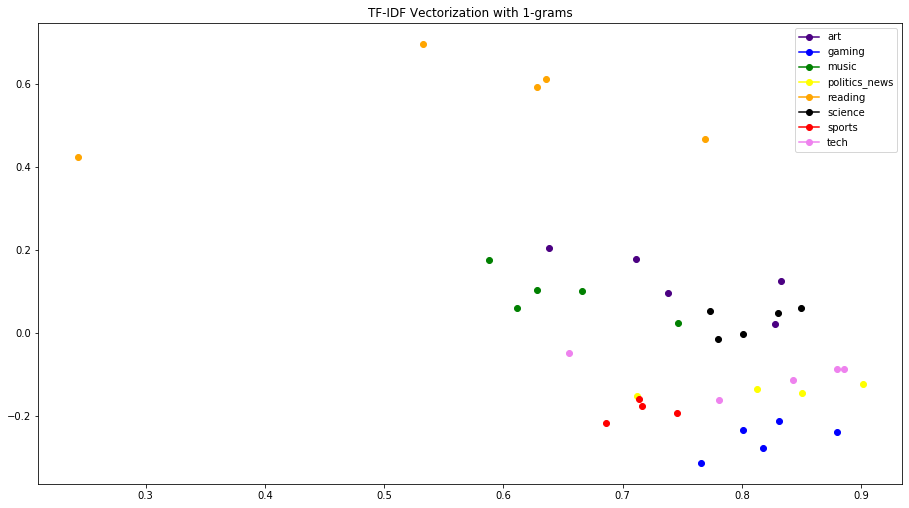

In [9]:
colors = {'sports': ['red', 0], 'reading': ['orange', 0], 'politics_news': ['yellow', 0], 'music': ['green', 0], 'gaming': ['blue', 0], 'art': ['indigo', 0], 'tech': ['violet', 0], 'science': ['black', 0]}

fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(X_plot):
    ax.plot(sub[0], sub[1], color=colors[documents[i][1]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()
ax.set_title('TF-IDF Vectorization with 1-grams')

**K-Means**

In [11]:
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,1))
X = tfidf_vectorizer.fit_transform(documents[:, 0])
svd = TruncatedSVD(n_components=10)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

In [12]:
km = MiniBatchKMeans(n_clusters=len(cats), init='k-means++', n_init=3, init_size=1000, batch_size=1000)
km.fit(X)

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
                init_size=1000, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Text(0.5, 1.0, 'K-Means Clustering')

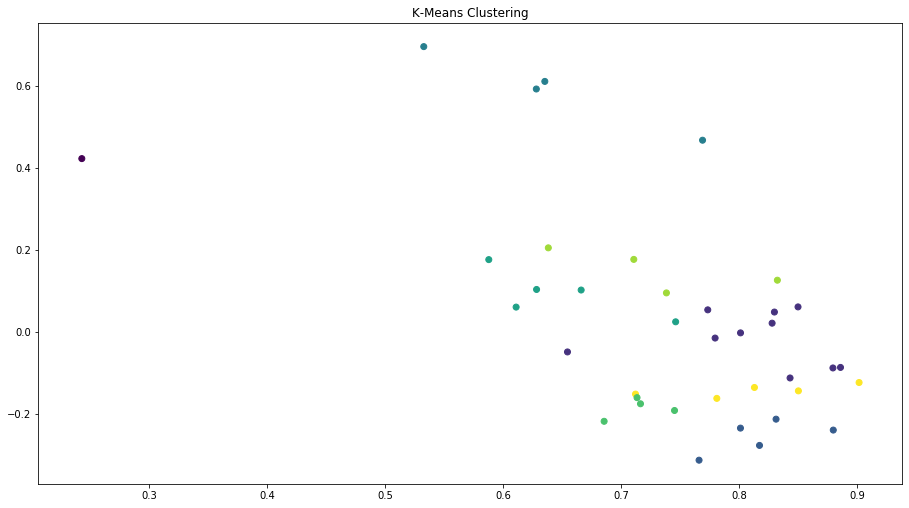

In [24]:
fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.scatter(X_plot[:, 0], X_plot[:, 1], c=km.labels_)
    
ax.set_title('K-Means Clustering')

In [25]:
labels = np.array(documents[:, 2], dtype=int)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))

Homogeneity: 0.849
Completeness: 0.899
V-measure: 0.873


This is a fantastic start!

In [26]:
print(f'Silhouette score: {metrics.silhouette_score(X, labels=km.labels_.reshape(-1))}')

Silhouette score: 0.5076415088512567


Silhouette score is decent but not fantastic.

## Clustering Posts

I think this is the more interesting part.

**Read in posts:**

In [3]:
documents = []

for cat in cats:
    os.chdir(fr'C:\Users\jonat\Desktop\Data Mining\Project\Data\{cat}\Processed\{stem}')
    files = glob.glob('*.json')
    for file in files:
        with open(fr'C:\Users\jonat\Desktop\Data Mining\Project\Data\{cat}\Processed\{stem}\{file}', 'r') as f:
            comments = json.load(f)
        df = pd.DataFrame(comments)
        posts = df['post_id'].unique()
        for post in posts:
            documents.append((' '.join(list(df[df['post_id'] == post]['comment'])), cat, cat, file.split('.json')[0]))
        
documents = np.array(documents)

In [4]:
encoder = LabelEncoder()
documents[:, 2] = encoder.fit_transform(documents[:, 2])

**Plot for visualization**

In [32]:
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,1))
X_plot = tfidf_vectorizer.fit_transform(documents[:, 0])
svd = TruncatedSVD()

X_plot = svd.fit_transform(X_plot)

Text(0.5, 1.0, 'TF-IDF Vectorization with 1-grams')

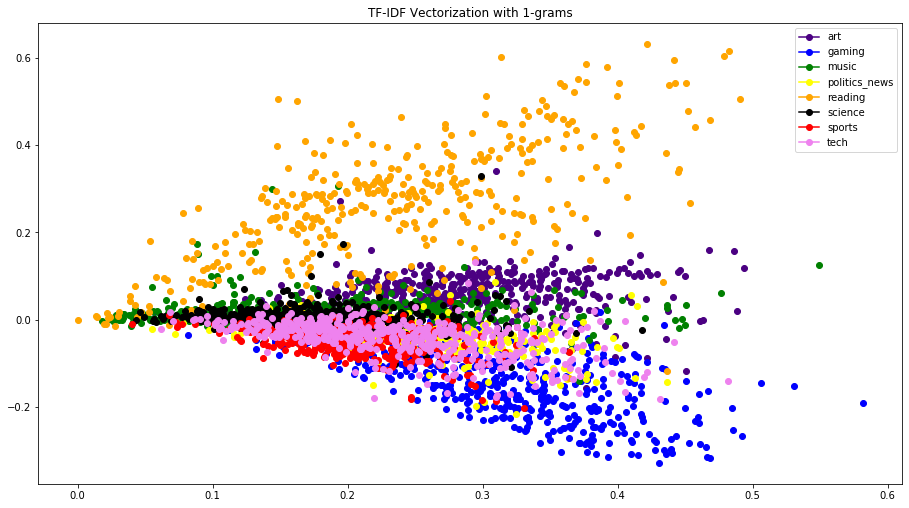

In [33]:
colors = {'sports': ['red', 0], 'reading': ['orange', 0], 'politics_news': ['yellow', 0], 'music': ['green', 0], 'gaming': ['blue', 0], 'art': ['indigo', 0], 'tech': ['violet', 0], 'science': ['black', 0]}

fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(X_plot):
    ax.plot(sub[0], sub[1], color=colors[documents[i][1]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()
ax.set_title('TF-IDF Vectorization with 1-grams')

**K-Means**

In [31]:
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,1))
X = tfidf_vectorizer.fit_transform(documents[:, 0])
svd = TruncatedSVD(n_components=10)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

In [34]:
km = MiniBatchKMeans(n_clusters=len(cats), init='k-means++', n_init=3, init_size=1000, batch_size=1000)
km.fit(X)

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
                init_size=1000, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Text(0.5, 1.0, 'K-Means Clustering')

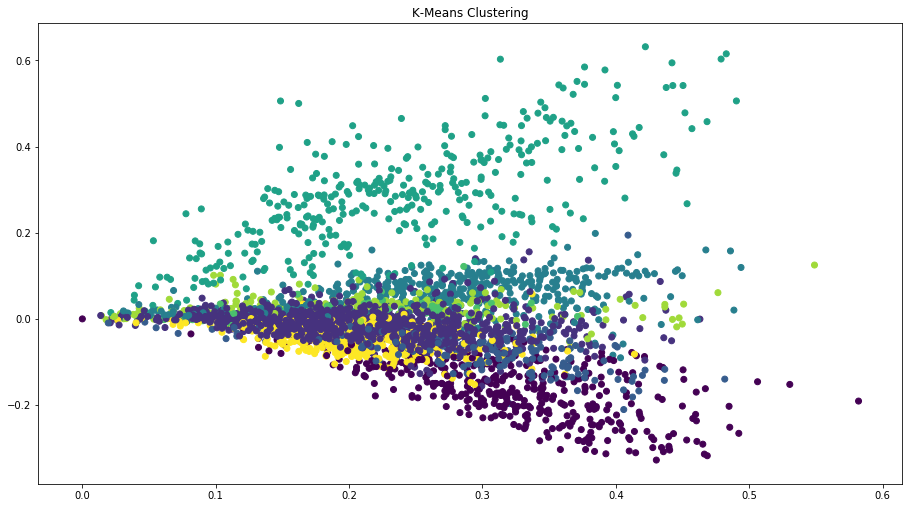

In [35]:
fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.scatter(X_plot[:, 0], X_plot[:, 1], c=km.labels_)
    
ax.set_title('K-Means Clustering')

In [36]:
labels = np.array(documents[:, 2], dtype=int)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))

Homogeneity: 0.595
Completeness: 0.646
V-measure: 0.619


In [37]:
print(f'Silhouette score: {metrics.silhouette_score(X, labels=km.labels_.reshape(-1))}')

Silhouette score: 0.41917222864235687


This is a bit rough!  However, I don't think it's possible to get perfect external measures for this clustering.  Let's play around a bit with parameters.  For one, let's reduce our tf-idf vectors to be 2-dimensional and keep the same number of clusters:

In [38]:
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,1))
X = tfidf_vectorizer.fit_transform(documents[:, 0])
svd = TruncatedSVD(n_components=2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

In [39]:
km = MiniBatchKMeans(n_clusters=len(cats), init='k-means++', n_init=3, init_size=1000, batch_size=1000)
km.fit(X)

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
                init_size=1000, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Text(0.5, 1.0, 'K-Means Clustering')

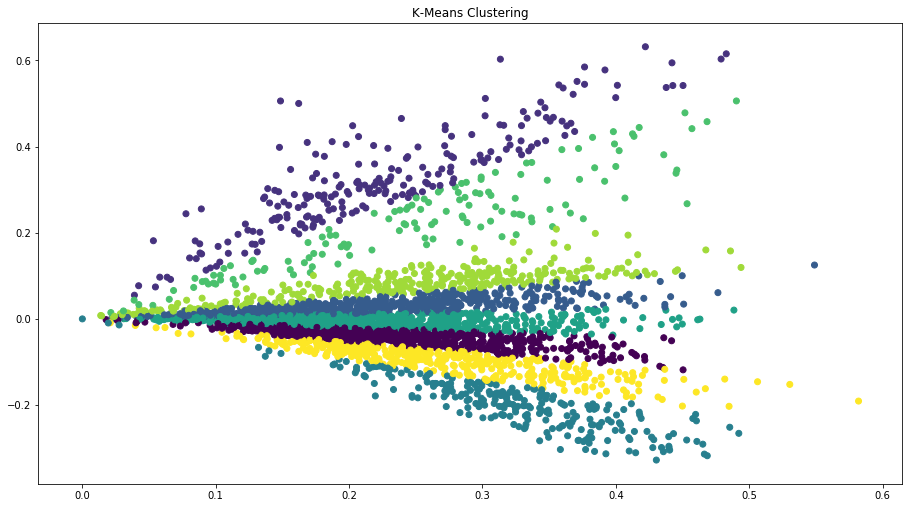

In [40]:
fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.scatter(X_plot[:, 0], X_plot[:, 1], c=km.labels_)
    
ax.set_title('K-Means Clustering')

This is incredibly neat, but let's see how it performs:

In [41]:
labels = np.array(documents[:, 2], dtype=int)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))

Homogeneity: 0.363
Completeness: 0.391
V-measure: 0.376


Terrible external measures, but I think we should move beyond external measures.

In [42]:
print(f'Silhouette score: {metrics.silhouette_score(X, labels=km.labels_.reshape(-1))}')

Silhouette score: 0.5342365916334324


So, silhouette score has improved a bit over the old model.  Let's take a look at total inertia:

In [43]:
print(f'Inertia: {km.inertia_}')

Inertia: 11.605101816887542


This isn't terrible, but can we do better?  Let's keep the number of components at 2 and look for a better k using the elbow method:

In [44]:
sse = []
list_k = list(range(2, 30))
for k in list_k:
    km = MiniBatchKMeans(n_clusters=k, init='k-means++')
    km.fit(X)
    sse.append(km.inertia_)

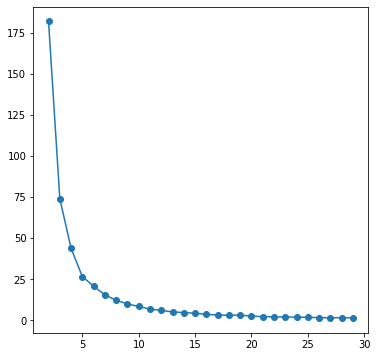

In [45]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, marker='o')

Let's choose k=15:

In [46]:
km = MiniBatchKMeans(n_clusters=15, init='k-means++')
km.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=15, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Text(0.5, 1.0, 'K-Means Clustering')

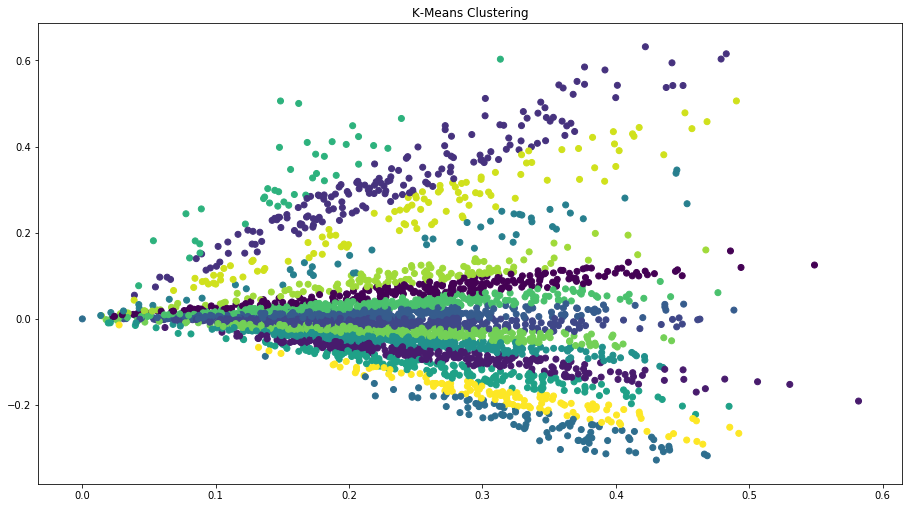

In [47]:
fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.scatter(X_plot[:, 0], X_plot[:, 1], c=km.labels_)
    
ax.set_title('K-Means Clustering')

In [49]:
print(f'Silhouette score: {metrics.silhouette_score(X, labels=km.labels_.reshape(-1))}')

Silhouette score: 0.5162430749173887


In [50]:
print(f'Inertia: {km.inertia_}')

Inertia: 3.9431990106479313


## Using Word Embeddings

In [5]:
import spacy

In [6]:
nlp = spacy.load("en_core_web_lg")

In [30]:
doc_vectors = []
for document in documents:
    doc = nlp(str(document[0]))
    doc_vectors.append(doc.vector)

In [7]:
import pickle

In [35]:
pickle.dump(doc_vectors, open('document_vectors.pickle', 'wb'))

In [8]:
import os

In [20]:
doc_vectors = pickle.load(open('document_vectors.pickle', 'rb'))

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2, svd_solver='randomized')
pca.fit(doc_vectors)

transformed = pca.transform(doc_vectors)

In [32]:
doc_vectors = np.array(doc_vectors)

In [33]:
def get_label(i, colors, documents):
    if colors[documents[i][1]][1] == 0:
        colors[documents[i][1]][1] += 1
        return documents[i][1]
    else:
        return ""

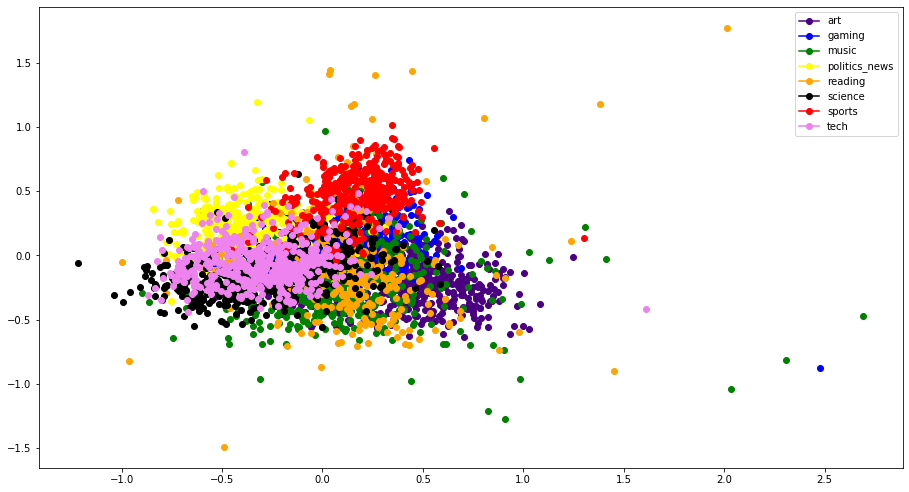

In [34]:
colors = {'sports': ['red', 0], 'reading': ['orange', 0], 'politics_news': ['yellow', 0], 'music': ['green', 0], 'gaming': ['blue', 0], 'art': ['indigo', 0], 'tech': ['violet', 0], 'science': ['black', 0]}

fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(transformed):
    ax.plot(sub[0], sub[1], color=colors[documents[i][1]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [39]:
doc_scaled = scaler.fit_transform(doc_vectors)

pca = PCA(n_components=2, svd_solver='randomized')
pca.fit(doc_scaled)

transformed = pca.transform(doc_scaled)

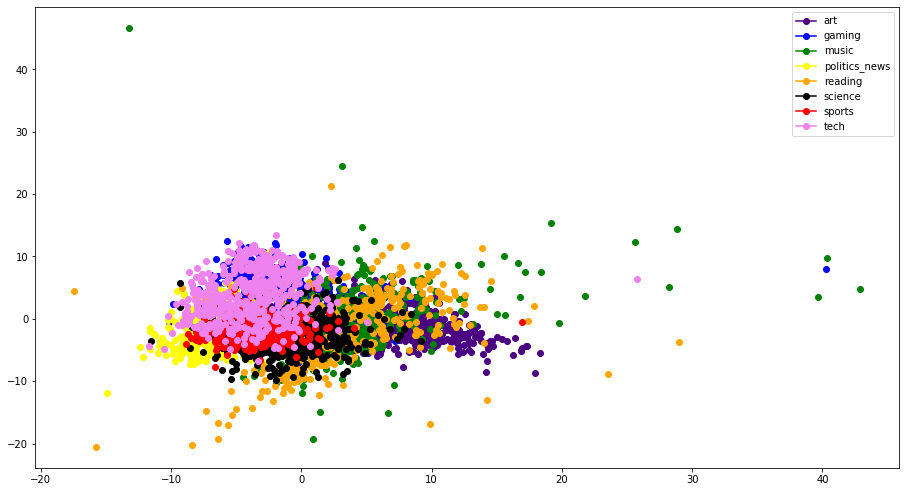

In [40]:
colors = {'sports': ['red', 0], 'reading': ['orange', 0], 'politics_news': ['yellow', 0], 'music': ['green', 0], 'gaming': ['blue', 0], 'art': ['indigo', 0], 'tech': ['violet', 0], 'science': ['black', 0]}

fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(transformed):
    ax.plot(sub[0], sub[1], color=colors[documents[i][1]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()

**K-Means with Embeddings**

In [47]:
doc_scaled = scaler.fit_transform(doc_vectors)

pca = PCA(n_components=2, svd_solver='randomized')
pca.fit(doc_scaled)

X_plot = pca.transform(doc_scaled)

In [48]:
scaler = StandardScaler()
doc_scaled = scaler.fit_transform(doc_vectors)

pca = PCA(svd_solver='randomized')
pca.fit(doc_scaled)

transformed = pca.transform(doc_scaled)

In [49]:
km = MiniBatchKMeans(n_clusters=len(cats), init='k-means++', n_init=3, init_size=1000, batch_size=1000)
km.fit(transformed)

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
                init_size=1000, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Text(0.5, 1.0, 'K-Means Clustering')

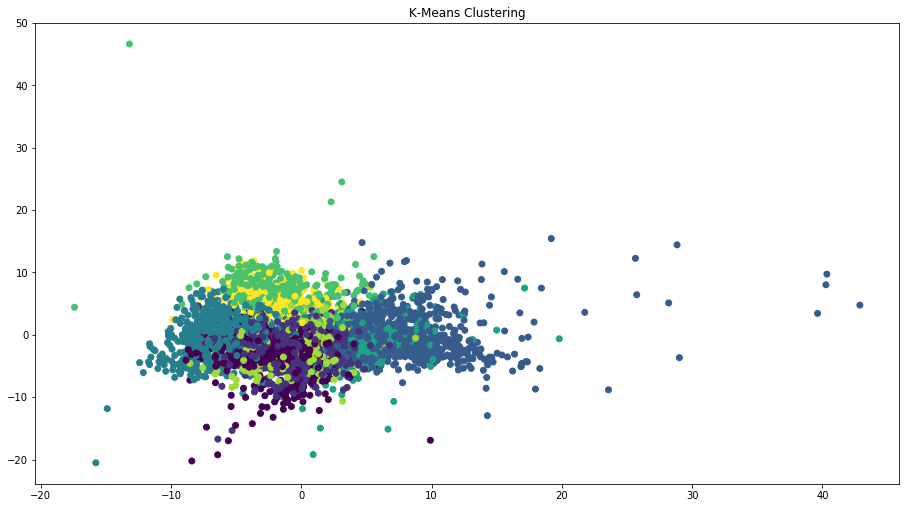

In [50]:
fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.scatter(X_plot[:, 0], X_plot[:, 1], c=km.labels_)
    
ax.set_title('K-Means Clustering')

In [51]:
labels = np.array(documents[:, 2], dtype=int)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))

Homogeneity: 0.507
Completeness: 0.521
V-measure: 0.514


In [52]:
print(f'Silhouette score: {metrics.silhouette_score(transformed, labels=km.labels_.reshape(-1))}')

Silhouette score: 0.06610824912786484


## Using Gensim

In [62]:
import gensim

In [77]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [271]:
docs = list(documents[:, 0])

In [272]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(docs)]

In [273]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=20)

In [274]:
model.build_vocab(tagged_data)

In [275]:
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [276]:
doc_vectors = []
for i in range(0, len(tagged_data)):
    doc_vectors.append(model[str(i)])

In [277]:
doc_vectors = np.array(doc_vectors)

In [278]:
pca = PCA(n_components=2, svd_solver='randomized')
pca.fit(doc_vectors)

X_plot = pca.transform(doc_vectors)

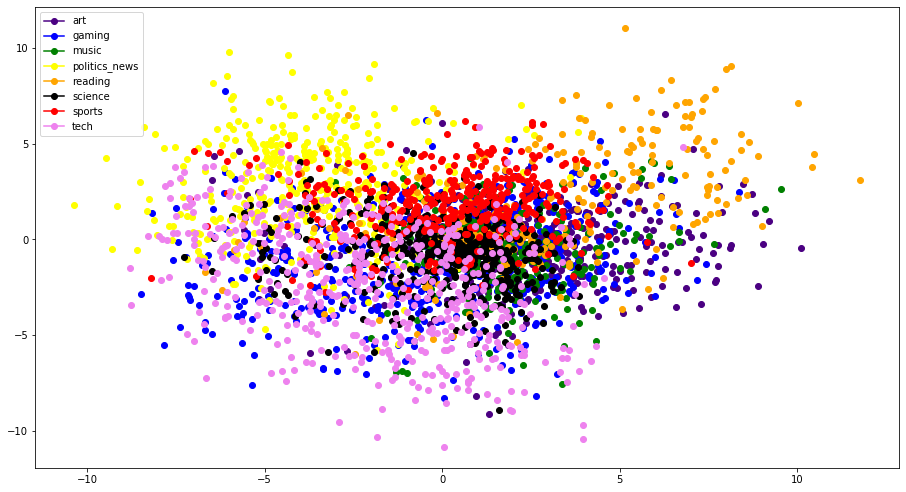

In [279]:
colors = {'sports': ['red', 0], 'reading': ['orange', 0], 'politics_news': ['yellow', 0], 'music': ['green', 0], 'gaming': ['blue', 0], 'art': ['indigo', 0], 'tech': ['violet', 0], 'science': ['black', 0]}

fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(X_plot):
    ax.plot(sub[0], sub[1], color=colors[documents[i][1]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()

**K-Means with doc2vec**

In [280]:
km = MiniBatchKMeans(n_clusters=38, init='k-means++', n_init=3)
km.fit(doc_vectors)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=38, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Text(0.5, 1.0, 'K-Means Clustering')

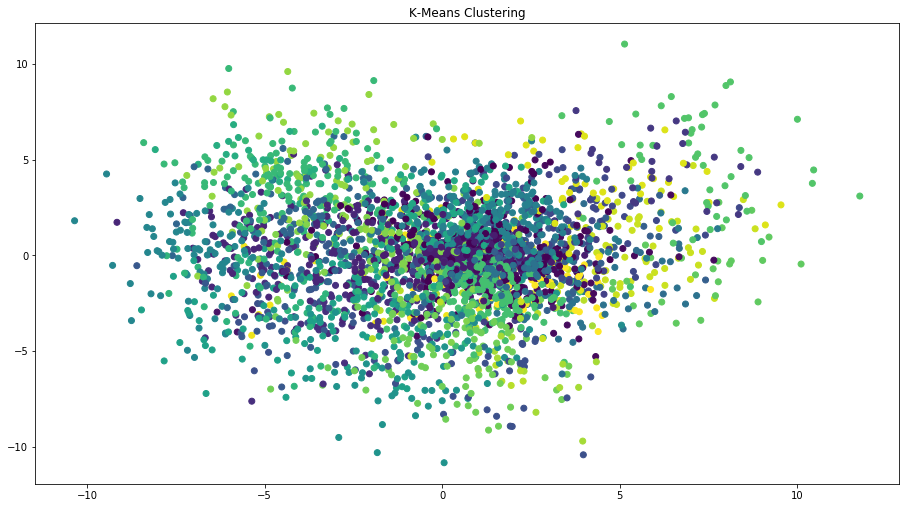

In [281]:
fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.scatter(X_plot[:, 0], X_plot[:, 1], c=km.labels_)
    
ax.set_title('K-Means Clustering')

In [282]:
print(f'Silhouette score: {metrics.silhouette_score(doc_vectors, labels=km.labels_.reshape(-1))}')

Silhouette score: 0.004785070661455393


In [283]:
labels = np.array(documents[:, 2], dtype=int)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))

Homogeneity: 0.466
Completeness: 0.294
V-measure: 0.361


In [171]:
sill = []
list_k = list(range(2, 100))
for k in list_k:
    km = MiniBatchKMeans(n_clusters=k, init='k-means++')
    km.fit(doc_vectors)
    sill.append(metrics.silhouette_score(doc_vectors, labels=km.labels_.reshape(-1)))

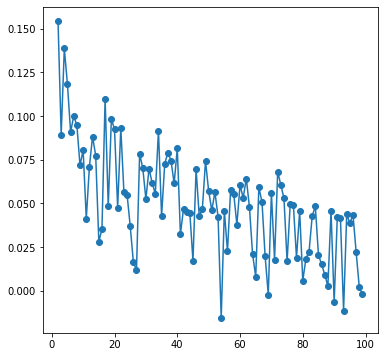

In [172]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sill, marker='o')

In [173]:
v = []
list_k = list(range(2, 100))
for k in list_k:
    km = MiniBatchKMeans(n_clusters=k, init='k-means++')
    km.fit(doc_vectors)
    v.append(metrics.v_measure_score(labels, km.labels_))

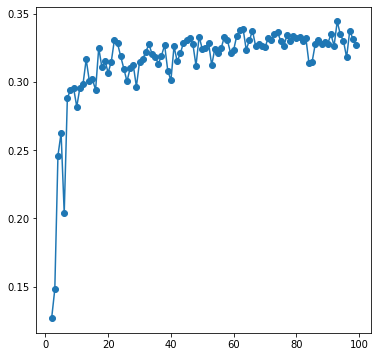

In [174]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, v, marker='o')

In [291]:
doc_id = random.randint(0, len(tagged_data) - 1)
inferred_vector = model.infer_vector(tagged_data[doc_id][0])
sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))

In [310]:
indexes = np.array(sims[1:11], dtype=int)[:, 0]

In [311]:
for index in indexes:
    print(documents[index][1])

politics_news
politics_news
politics_news
tech
politics_news
art
politics_news
tech
tech
politics_news


In [313]:
for index in indexes:
    print(documents[index][3])

PoliticalHumor
PoliticalHumor
PoliticalHumor
tech
PoliticalHumor
art
PoliticalHumor
tech
technology
PoliticalHumor


## Once more into the fray: 100 subreddits

In [183]:
with open('bigboi.pickle', 'rb') as f:
    test = pickle.load(f)

In [184]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(test)]

In [185]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=20, min_count=1, epochs=20)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [186]:
doc_vectors = []
for i in range(0, len(tagged_data)):
    doc_vectors.append(model[str(i)])

doc_vectors = np.array(doc_vectors)

In [221]:
pca = PCA(n_components=2, svd_solver='randomized')
pca.fit(doc_vectors)

X_plot = pca.transform(doc_vectors)

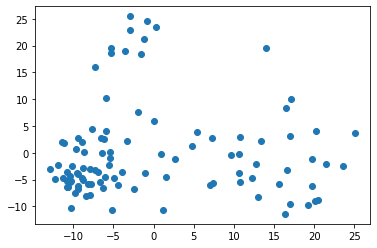

In [222]:
plt.scatter(X_plot[:, 0], X_plot[:, 1])

In [223]:
sill = []
list_k = list(range(2, len(doc_scaled)))
for k in list_k:
    km = MiniBatchKMeans(n_clusters=k, init='k-means++')
    km.fit(doc_vectors)
    sill.append(metrics.silhouette_score(doc_vectors, labels=km.labels_.reshape(-1)))

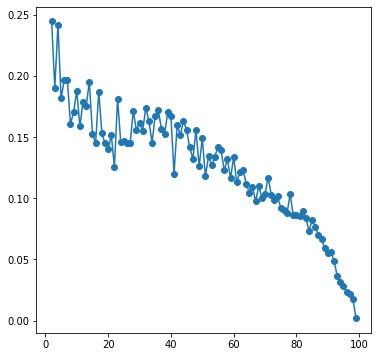

In [224]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sill, marker='o')

In [228]:
km = MiniBatchKMeans(n_clusters=3, init='k-means++')
km.fit(doc_vectors)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Text(0.5, 1.0, 'K-Means Clustering')

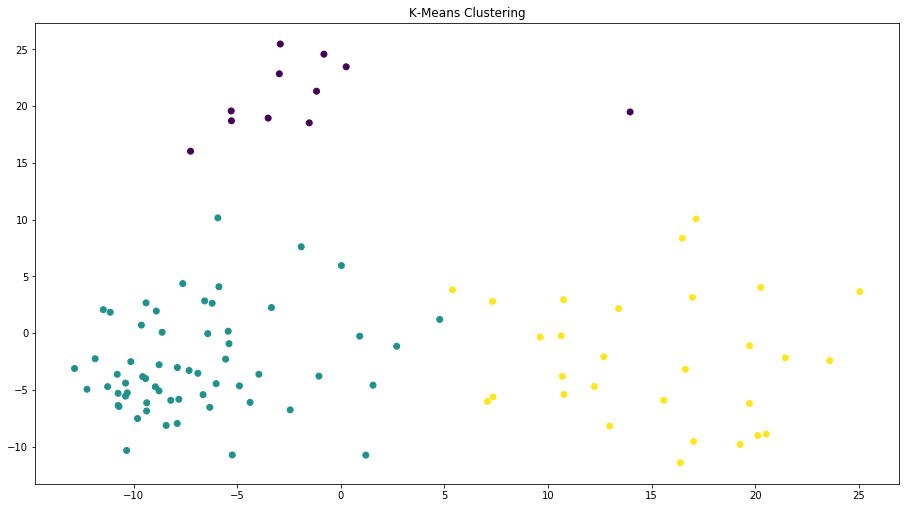

In [229]:
fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.scatter(X_plot[:, 0], X_plot[:, 1], c=km.labels_)
    
ax.set_title('K-Means Clustering')

In [230]:
print(f'Silhouette score: {metrics.silhouette_score(doc_vectors, labels=km.labels_.reshape(-1))}')

Silhouette score: 0.2634384036064148


**DBSCAN Time**

In [231]:
from sklearn.cluster import DBSCAN

In [232]:
from sklearn.neighbors import NearestNeighbors

In [233]:
nn = NearestNeighbors(n_neighbors=5)
nn.fit(doc_vectors)
distances, indices = nn.kneighbors(doc_vectors)

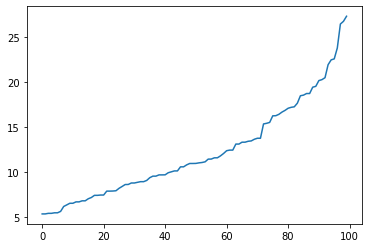

In [234]:
distances = np.sort(distances, axis=0)[:, 1]

plt.plot(distances)

In [235]:
dbscan = DBSCAN(eps=15)
dbscan.fit(doc_vectors)

DBSCAN(algorithm='auto', eps=15, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

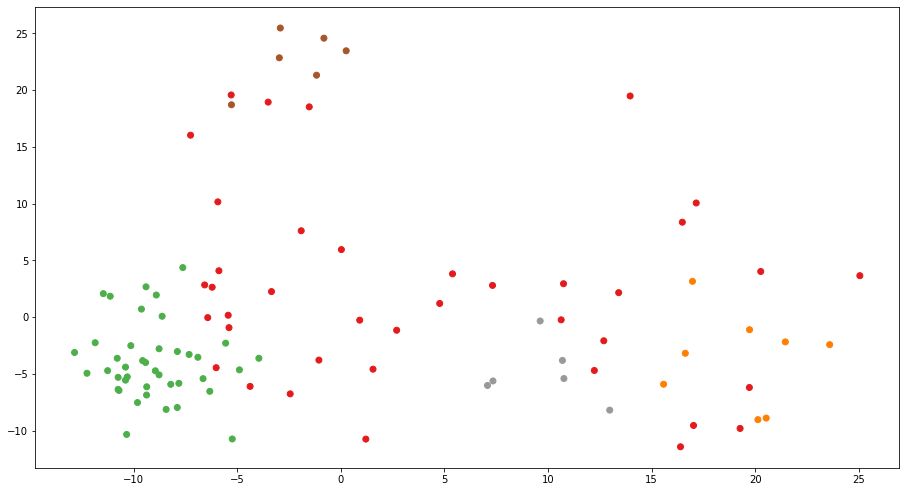

In [236]:
fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.scatter(X_plot[:, 0], X_plot[:, 1], c=dbscan.labels_, cmap=plt.cm.Set1)

In [237]:
print(f'Silhouette score: {metrics.silhouette_score(doc_vectors, labels=km.labels_.reshape(-1))}')

Silhouette score: 0.2634384036064148


In [247]:
import random

In [258]:
doc_id = random.randint(0, len(tagged_data) - 1)
inferred_vector = model.infer_vector(tagged_data[doc_id][0])
sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))

In [259]:
sims

[('61', 0.9954394698143005),
 ('37', 0.771134614944458),
 ('26', 0.7337557077407837),
 ('77', 0.6818562746047974),
 ('30', 0.6685581207275391),
 ('48', 0.6384214162826538),
 ('28', 0.6239892244338989),
 ('98', 0.5759525299072266),
 ('68', 0.574953556060791),
 ('94', 0.571973443031311),
 ('90', 0.5693896412849426),
 ('9', 0.56840980052948),
 ('29', 0.5585770010948181),
 ('32', 0.553687572479248),
 ('39', 0.5520204305648804),
 ('70', 0.5512980222702026),
 ('53', 0.5475544333457947),
 ('91', 0.5355222225189209),
 ('17', 0.533391535282135),
 ('19', 0.5327263474464417),
 ('80', 0.5266760587692261),
 ('71', 0.5169191956520081),
 ('33', 0.515516459941864),
 ('12', 0.5129619836807251),
 ('81', 0.5078692436218262),
 ('41', 0.4998852014541626),
 ('83', 0.4956362247467041),
 ('63', 0.4836588203907013),
 ('75', 0.47287648916244507),
 ('45', 0.46162307262420654),
 ('93', 0.4472070038318634),
 ('62', 0.4443102777004242),
 ('5', 0.4390081763267517),
 ('21', 0.4354502260684967),
 ('56', 0.433027207851

In [270]:
print(test[doc_id])

come th week bomb come near enough dead last difference top drew game instead lose use mardu token deck pretty fun play reprint flooded strand nothing else value last wish awesome thanks advice look forward blightning straight good discarddamage though point able hit creature instead player make damage frequently lot well blightning face able cast instant speed mean kcommand potentially even well topdecking opponent even ignore two effect compare blightning trap lot place effective blightning would foil good bent condition usually never problem also say lorthos tidemaker like since octopus see harrisburg nothing ever happen gti tired people use social medium push product stop come reddit go back discussion forum white thalia blue ancestral recall counterspell black dark confidant red lightning bolt green primeval titan hand ev fall pack start open ev depends fact noble hierarch right along high value rares card lose value mm start open ev less msrp therefore lottery nothing specific mi

In [269]:
print(test[37])

de golden gahz craft regular one happens literally every day personally happy delete thread talk game base problem find bullshit reason suspend speak dev team actually approach balance meta push card amount card fine need way way faster try hard bet commentary would better know broadcast thought conversation current game kt beat happen manage get emperor malygos player dumb wait inevitable clash warcraft clan release point lol feel dumb right since since always play since beta always tought row u orangehs please elaborate situation mekgineer buttplugg well three server right three hundred slot thousand subscriber math check imo someone never play wow think long time alexstrasza say bring life death fire help either sure could lose game row win row rank gt legend claim hit legend win rate disingenuous though part actually rank portion past rank must win rate great happen day hunter unleash enough time send puppy way subsequently lose love cause loss two friend get first legendary seem l